In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
from matplotlib import style
import seaborn as sns
plt.style.use("ggplot")

In [3]:
data = pd.read_csv("student_mat.csv", sep=";")

In [4]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


## Data analysis

In [5]:
df_analysis = data[["sex", "age", "traveltime","absences","freetime","studytime", "schoolsup", "health","failures","activities", "internet", "paid", "Fjob", "Mjob", "G1", "G2", "G3"]]

df_analysis.head()


,sex,age,traveltime,absences,freetime,studytime,schoolsup,health,failures,activities,internet,paid,Fjob,Mjob,G1,G2,G3
0,F,18,2,6,3,2,yes,3,0,no,no,no,teacher,at_home,5,6,6
1,F,17,1,4,3,2,no,3,0,no,yes,no,other,at_home,5,5,6
2,F,15,1,10,3,2,yes,3,3,no,yes,yes,other,at_home,7,8,10
3,F,15,1,2,2,3,no,5,0,yes,yes,yes,services,health,15,14,15
4,F,16,1,4,3,2,no,5,0,no,no,yes,other,other,6,10,10


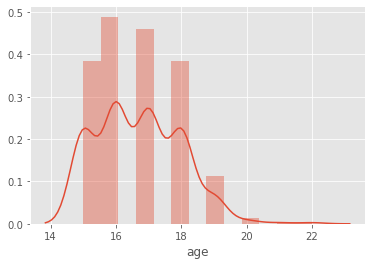

In [6]:
sns.distplot(df_analysis["age"], kde=True)

#### Maximum age students in the class is between 15 to 16

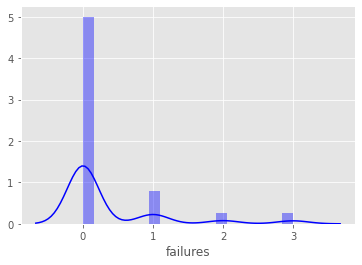

In [7]:
sns.distplot(df_analysis["failures"], kde=True, color="b")

#### Number of failures in the class is less 

## Graph showing absences related to age

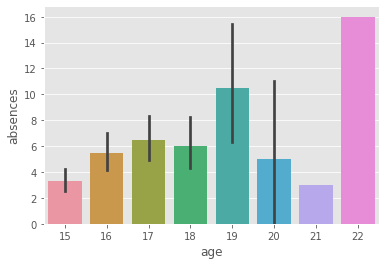

In [8]:
# health - current health status (numeric: from 1 - very bad to 5 - very good)
sns.barplot(x="age", y="absences", data=df_analysis)

#### The above graph shows that absences is maximum in the age 22 

##  Graphs showing absences affecting marks 

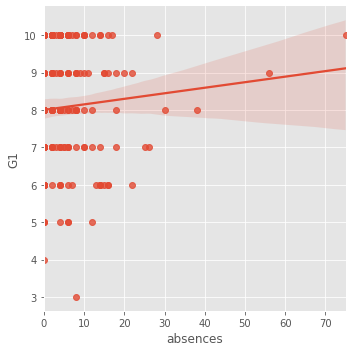

In [9]:
# remove outliers
df_analysis = df_analysis.loc[df_analysis['G1']< df_analysis['G1'].quantile(0.5)]
# plotting grpah
graph = sns.lmplot(x="absences", y="G1", data=df_analysis)

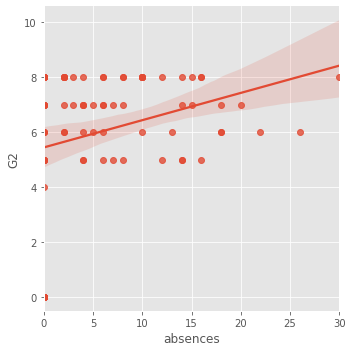

In [10]:
# remove outliers
df_analysis = df_analysis.loc[df_analysis['G2']< df_analysis['G2'].quantile(0.5)]
# ploting graph
graph = sns.lmplot(x="absences", y="G2", data=df_analysis)

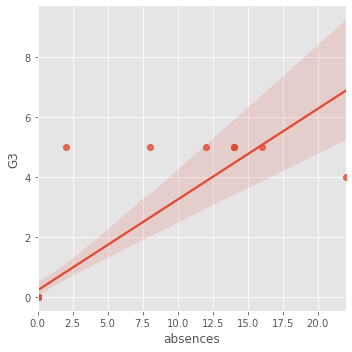

In [11]:

# remove outliers
df_analysis = df_analysis.loc[df_analysis['G3']< df_analysis['G3'].quantile(0.5)]
# plotting graph
graph = sns.lmplot(x="absences", y="G3", data=df_analysis)

#### We can clearly say that absence in class is somewhat related to lower marks obtained by students

## Final Marks prediction

In [12]:
df = data[["G1", "G2", "G3", "absences","studytime", "freetime", "health"]]

In [13]:
df.head()

,G1,G2,G3,absences,studytime,freetime,health
0,5,6,6,6,2,3,3
1,5,5,6,4,2,3,3
2,7,8,10,10,2,3,3
3,15,14,15,2,3,2,5
4,6,10,10,4,2,3,5


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   G1         395 non-null    int64
 1   G2         395 non-null    int64
 2   G3         395 non-null    int64
 3   absences   395 non-null    int64
 4   studytime  395 non-null    int64
 5   freetime   395 non-null    int64
 6   health     395 non-null    int64
dtypes: int64(7)
memory usage: 21.7 KB


### predict G3 marks 

In [15]:
predict = "G3"

In [16]:
# y = mx + c

# x will have g1 and g2 value only 
X = np.array(df.drop([predict], 1)) 
print(X)

[[ 5  6  6  2  3  3]
 [ 5  5  4  2  3  3]
 [ 7  8 10  2  3  3]
 ...
 [10  8  3  1  5  3]
 [11 12  0  1  4  5]
 [ 8  9  5  1  2  5]]


In [17]:
# y will have g3 value which we will predict
y = np.array(df[[predict]])
print(y)

[[ 6]
 [ 6]
 [10]
 [15]
 [10]
 [15]
 [11]
 [ 6]
 [19]
 [15]
 [ 9]
 [12]
 [14]
 [11]
 [16]
 [14]
 [14]
 [10]
 [ 5]
 [10]
 [15]
 [15]
 [16]
 [12]
 [ 8]
 [ 8]
 [11]
 [15]
 [11]
 [11]
 [12]
 [17]
 [16]
 [12]
 [15]
 [ 6]
 [18]
 [15]
 [11]
 [13]
 [11]
 [12]
 [18]
 [11]
 [ 9]
 [ 6]
 [11]
 [20]
 [14]
 [ 7]
 [13]
 [13]
 [10]
 [11]
 [13]
 [10]
 [15]
 [15]
 [ 9]
 [16]
 [11]
 [11]
 [ 9]
 [ 9]
 [10]
 [15]
 [12]
 [ 6]
 [ 8]
 [16]
 [15]
 [10]
 [ 5]
 [14]
 [11]
 [10]
 [10]
 [11]
 [10]
 [ 5]
 [12]
 [11]
 [ 6]
 [15]
 [10]
 [ 8]
 [ 6]
 [14]
 [10]
 [ 7]
 [ 8]
 [18]
 [ 6]
 [10]
 [14]
 [10]
 [15]
 [10]
 [14]
 [ 8]
 [ 5]
 [17]
 [14]
 [ 6]
 [18]
 [11]
 [ 8]
 [18]
 [13]
 [16]
 [19]
 [10]
 [13]
 [19]
 [ 9]
 [16]
 [14]
 [13]
 [ 8]
 [13]
 [15]
 [15]
 [13]
 [13]
 [ 8]
 [12]
 [11]
 [ 9]
 [ 0]
 [18]
 [ 0]
 [ 0]
 [12]
 [11]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [12]
 [15]
 [ 0]
 [ 9]
 [11]
 [13]
 [ 0]
 [11]
 [ 0]
 [11]
 [ 0]
 [10]
 [ 0]
 [14]
 [10]
 [ 0]
 [12]
 [ 8]
 [13]
 [10]
 [15]
 [12]
 [ 0]
 [ 7]
 [ 0]
 [10]
 [ 7]
 [12]
 [10

In [18]:
# spliting the data into test and train in the ratio of 90:10
# spliting into four arrays



#### spliting data syntax here should be moved after tranning module

In [19]:

# x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1, random_state=0)


#### Only best tranied model will get saved 

In [20]:
best = 0
for i in range(100):
    
    # spliting data syntax should be moved out of the loop after tranning and storing trained module.
    # after test_size in for loop should be added not to select random data while splitting. syntax : random_state=0
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)

    linear = linear_model.LinearRegression()
    

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    # accuracy 
    print("accuracy:", acc)
    
    
    # saving the model: 

    #studentmodel is the name of the model
    #wb mode
    
    if acc>best:
        best=acc
        with open("studentmodel.pickle", "wb") as f:
            pickle.dump(linear, f) 

print("best accuracy:",best)

LinearRegression()

accuracy: 0.7287339588419497


LinearRegression()

accuracy: 0.9075453135083564


LinearRegression()

accuracy: 0.866221969130624


LinearRegression()

accuracy: 0.8541975843811148


LinearRegression()

accuracy: 0.863919680205584


LinearRegression()

accuracy: 0.8289978679131469


LinearRegression()

accuracy: 0.8416675907289775


LinearRegression()

accuracy: 0.8103271089288911


LinearRegression()

accuracy: 0.7710682648347664


LinearRegression()

accuracy: 0.6948706227375314


LinearRegression()

accuracy: 0.6990161801941306


LinearRegression()

accuracy: 0.9068197630103219


LinearRegression()

accuracy: 0.8373025678847341


LinearRegression()

accuracy: 0.837105482459177


LinearRegression()

accuracy: 0.7436343065024507


LinearRegression()

accuracy: 0.7723472469482392


LinearRegression()

accuracy: 0.845289248907327


LinearRegression()

accuracy: 0.6927984365955755


LinearRegression()

accuracy: 0.8525837591506528


LinearRegression()

accuracy: 0.6782499548587138


LinearRegression()

accuracy: 0.7956066136083743


LinearRegression()

accuracy: 0.7918739626218915


LinearRegression()

accuracy: 0.8433915725075389


LinearRegression()

accuracy: 0.8277968251354008


LinearRegression()

accuracy: 0.8665035747654353


LinearRegression()

accuracy: 0.8788503947961159


LinearRegression()

accuracy: 0.8287733254643344


LinearRegression()

accuracy: 0.7510209292262507


LinearRegression()

accuracy: 0.8484012152423085


LinearRegression()

accuracy: 0.8604025830725639


LinearRegression()

accuracy: 0.8318548874867008


LinearRegression()

accuracy: 0.8588407175718734


LinearRegression()

accuracy: 0.7261255121247198


LinearRegression()

accuracy: 0.740784028265834


LinearRegression()

accuracy: 0.8051697887637981


LinearRegression()

accuracy: 0.7140159911674415


LinearRegression()

accuracy: 0.8153358985380184


LinearRegression()

accuracy: 0.7046110475035707


LinearRegression()

accuracy: 0.7079551762432763


LinearRegression()

accuracy: 0.6963737214108625


LinearRegression()

accuracy: 0.7712226175233026


LinearRegression()

accuracy: 0.8545468238878241


LinearRegression()

accuracy: 0.7944459826610605


LinearRegression()

accuracy: 0.7901965204783135


LinearRegression()

accuracy: 0.6350124186606789


LinearRegression()

accuracy: 0.8151292804219812


LinearRegression()

accuracy: 0.900693831323057


LinearRegression()

accuracy: 0.7917951192643358


LinearRegression()

accuracy: 0.7473907853759905


LinearRegression()

accuracy: 0.8514433993991469


LinearRegression()

accuracy: 0.8665095430764016


LinearRegression()

accuracy: 0.8834600905216017


LinearRegression()

accuracy: 0.75258344865621


LinearRegression()

accuracy: 0.7046650350243236


LinearRegression()

accuracy: 0.7852161181970303


LinearRegression()

accuracy: 0.835090235746798


LinearRegression()

accuracy: 0.8826318672149887


LinearRegression()

accuracy: 0.8633661182706764


LinearRegression()

accuracy: 0.7720277800886818


LinearRegression()

accuracy: 0.81441440559698


LinearRegression()

accuracy: 0.7817657346387258


LinearRegression()

accuracy: 0.6983962800997672


LinearRegression()

accuracy: 0.8336637213600212


LinearRegression()

accuracy: 0.8072749408128991


LinearRegression()

accuracy: 0.8667820454386547


LinearRegression()

accuracy: 0.8001658858534724


LinearRegression()

accuracy: 0.7617649182276046


LinearRegression()

accuracy: 0.8995063922996225


LinearRegression()

accuracy: 0.8399806632102844


LinearRegression()

accuracy: 0.7765108653510285


LinearRegression()

accuracy: 0.7121495579475084


LinearRegression()

accuracy: 0.7804751492068369


LinearRegression()

accuracy: 0.8839325126057213


LinearRegression()

accuracy: 0.8188205212050077


LinearRegression()

accuracy: 0.8830423201800608


LinearRegression()

accuracy: 0.8663150765041583


LinearRegression()

accuracy: 0.8255174574654681


LinearRegression()

accuracy: 0.8746370373343172


LinearRegression()

accuracy: 0.7795986146453705


LinearRegression()

accuracy: 0.8738466680546016


LinearRegression()

accuracy: 0.8786264226962807


LinearRegression()

accuracy: 0.8531068484992925


LinearRegression()

accuracy: 0.8626793045765676


LinearRegression()

accuracy: 0.8581830517586054


LinearRegression()

accuracy: 0.8371649479190786


LinearRegression()

accuracy: 0.8492952202701045


LinearRegression()

accuracy: 0.8884133463909057


LinearRegression()

accuracy: 0.8435549051538769


LinearRegression()

accuracy: 0.840788495265074


LinearRegression()

accuracy: 0.890421427479272


LinearRegression()

accuracy: 0.8694771892722212


LinearRegression()

accuracy: 0.8051541961105799


LinearRegression()

accuracy: 0.6213720030174185


LinearRegression()

accuracy: 0.9020443491409531


LinearRegression()

accuracy: 0.6309509858630562


LinearRegression()

accuracy: 0.7097810196392198


LinearRegression()

accuracy: 0.8733528445805399


LinearRegression()

accuracy: 0.9202591357392992


LinearRegression()

accuracy: 0.8788615277598404


LinearRegression()

accuracy: 0.8648980724891585
best accuracy: 0.9202591357392992


#### After traning the model for 100 times, accuracy usually remains between 89 to 94 %

#### model is trained and saved. So we commented this section of training the model.

In [21]:
# linear = linear_model.LinearRegression()

In [22]:
# linear.fit(x_train, y_train)
# acc = linear.score(x_test, y_test)
# accuracy 
#print(acc)

In [23]:
# saving the model: 

# studentmodel is the name of the model
# wb mode
# with open("studentmodel.pickle", "wb") as f:
    #pickle.dump(linear, f) 

In [24]:
# loading the pickle file with model so that we do not need to train our model every time
pickle_in = open("studentmodel.pickle", "rb")
linear = pickle.load(pickle_in) 

In [25]:
print('Coefficient(m): \n', linear.coef_)
print('Intercept: \n', linear.intercept_)

Coefficient(m): 
 [[ 0.16991619  0.98129786  0.04694009 -0.08460636  0.08831681  0.09810284]]
Intercept: 
 [-2.67039212]


In [31]:
y_pred = linear.predict(x_train)

In [32]:
print(len(y_pred))

355


In [33]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_train,y_pred)

1.2000986229900772

In [36]:
for x in range(len(y_pred)):
    # checking for prerdict output
    print(x_train[x],y_train[x], y_pred[x])
    

[7 7 5 2 3 4] [7] [6.11095577]
[11 11  0  2  3  3] [10] [10.38300869]
[10  9 75  2  1  5] [9] [11.79057552]
[14 13  2  2  2  1] [13] [12.66471066]
[12 13  6  1  4  5] [14] [13.16628999]
[ 7  6 10  2  4  5] [6] [5.55077801]
[ 8 11  0  2  4  5] [11] [10.15778262]
[ 9  9 56  2  3  1] [8] [10.51301988]
[7 6 4 2 3 2] [6] [4.88651213]
[9 9 4 2 4 1] [10] [8.16045206]
[ 6  8 16  1  4  1] [8] [7.31729306]
[7 6 0 1 2 1] [0] [4.59693848]
[16 15 10  2  3  3] [15] [15.62718197]
[16 18  0  2  2  1] [19] [17.81715217]
[ 7  8 10  2  3  3] [10] [7.22885123]
[15 14  2  3  2  5] [15] [14.12372973]
[8 8 0 2 3 1] [0] [6.73316084]
[16 15  2  2  2  1] [15] [14.96713876]
[6 5 0 1 3 4] [0] [3.82834977]
[7 9 2 1 4 5] [8] [8.20375724]
[10 13  6  1  3  1] [13] [12.34572943]
[8 9 2 2 1 4] [8] [7.9260138]
[9 8 6 1 2 4] [10] [7.47531565]
[10  0  0  2  4  5] [0] [-0.29666149]
[11 11  2  2  4  3] [10] [10.56520567]
[8 9 0 1 5 5] [10] [8.36811006]
[10 13  4  1  3  5] [14] [12.64426063]
[8 7 7 1 3 3] [8] [6.36125565]
[1

[17 18  0  1  5  5] [18] [18.72903652]
[10 10  2  2  4  3] [11] [9.41399162]
[8 7 0 1 5 5] [6] [6.40551433]
[12 12  8  1  4  5] [12] [12.27887231]
[8 8 8 2 2 5] [6] [7.41277613]
[ 8  8 10  4  3  3] [8] [7.22955471]
[16 18  0  2  4  1] [18] [17.99378579]
[ 8  8 30  1  5  5] [8] [8.79501487]
[14 12 20  2  4  2] [13] [12.80307086]
[13 14  0  1  4  5] [13] [14.03586351]
[ 6  5 14  1  5  1] [5] [4.3678361]
[10 10  2  1  3  2] [10] [9.31217833]
[10 12  2  1  2  3] [12] [11.28456009]
[12 11 16  1  2  5] [11] [11.49646154]
[8 8 0 1 4 1] [11] [6.90608401]
[6 8 0 1 4 5] [8] [6.95866301]
[8 8 4 1 4 5] [8] [7.48625574]
[13 11  3  2  5  4] [11] [11.13839779]
[12 14  0  1  4  5] [15] [13.86594732]
[15 14 20  2  4  3] [13] [15.03368562]
[8 7 8 2 4 2] [8] [6.31380335]
[7 9 0 2 3 1] [8] [7.54454252]
[16 17  0  2  4  5] [17] [17.40489931]
[12 14  1  3  4  5] [15] [13.74367469]


### The easiest way to compare the target and prediction is to plot them of scatter plot

Text(0.5, 0, 'Targets (y_train)')

Text(0, 0.5, 'Predictions (y_pred)')

(0.0, 22.0)

(0.0, 22.0)

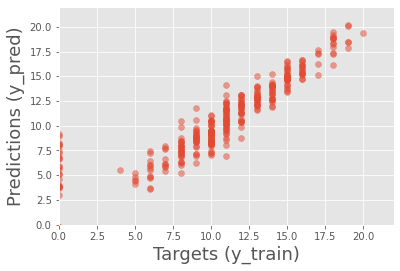

In [37]:
plt.scatter(y_train, y_pred, alpha=0.5)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_pred)',size=18)
# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'
# We want the x-axis and the y-axis to be the same
plt.xlim(0,22)
plt.ylim(0,22)
plt.show()

#### From the above graph we can clearly say that our model predicts almost accurate results. 
#### Howerver there are few wrong predictions. More tranning the model might help. 

## Testing the model:

In [ ]:
y_pred_test = lreg.predict(x_test)